In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
edits = pd.read_json("../RQ2/editSteps.json")
runs = pd.read_json("../RQ2/runSteps.json")
import json
import urllib.request
import plotly.graph_objects as go


In [3]:
# when other occurred in edit, what is the % of other 

In [4]:
otherEdit = edits[(edits.otherResourcesTime > 0)|(edits.otherIssueTime > 0)|(edits.otherNotesTime > 0)|(edits.otherInteractionTime > 0)]
otherEdit.groupby("work").describe()

cycleTime                                                     \
                count        mean         std   min    25%    50%    75%   
work                                                                       
debugging       103.0  209.902913  195.556447  21.0   96.0  147.0  252.0   
programming      85.0  339.552941  358.595159  19.0  140.0  229.0  428.0   

                    activities            ... otherNotesTime         \
                max      count      mean  ...            75%    max   
work                                      ...                         
debugging    1206.0      103.0  3.902913  ...            0.0  146.0   
programming  1903.0       85.0  6.517647  ...            0.0  548.0   

            otherInteractionTime                                               \
                           count       mean         std  min  25%   50%   75%   
work                                                                            
debugging                  103.0  20.165049   34.441510  0.0  0.0   7.0  20.5   
programming                 85.0  57.752941  110.696916  0.0  0.0  16.0  69.0   

                    
               max  
work                
debugging    185.0  
programming  607.0  

[2 rows x 72 columns]

In [5]:
otherRun = runs[(runs.otherResourcesTime > 0)|(runs.otherIssueTime > 0)|(runs.otherNotesTime > 0)|(runs.otherInteractionTime > 0)]
otherRun.groupby("work").otherNotesTime.describe()

,count,mean,std,min,25%,50%,75%,max
work,,,,,,,,
debugging,7.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
programming,14.0,12.785714,40.01188,0.0,0.0,0.0,0.0,149.0


In [6]:
numberOfEditsDebugging,numberOfEditsProgramming  = edits.groupby("work").cycleTime.count()

In [7]:
numberOfEditsOtherResourcesDebugging,numberOfEditsOtherResourcesProgramming  = edits[edits["otherResourcesTime"]>0].groupby("work").cycleTime.count()
numberOfEditsOtherIssueDebugging,numberOfEditsOtherIssueProgramming  = edits[edits["otherIssueTime"]>0].groupby("work").cycleTime.count()
numberOfEditsOtherNoteDebugging,numberOfEditsOtherNoteProgramming  = edits[edits["otherNotesTime"]>0].groupby("work").cycleTime.count()
numberOfEditsOtherInteractionDebugging,numberOfEditsOtherInteractionProgramming  = edits[edits["otherInteractionTime"]>0].groupby("work").cycleTime.count()

In [8]:
otherEditResult = pd.DataFrame({"work":["debugging", "programming","debugging", "programming","debugging", "programming","debugging", "programming"],"characteristics": ["resources","resources",  "Issues","Issues", "Notes", "Notes","IDE", "IDE"], "percentage":[numberOfEditsOtherResourcesDebugging/ numberOfEditsDebugging*100,numberOfEditsOtherResourcesProgramming/ numberOfEditsProgramming*100,numberOfEditsOtherIssueDebugging/ numberOfEditsDebugging*100, numberOfEditsOtherIssueProgramming/ numberOfEditsProgramming*100,numberOfEditsOtherNoteDebugging/ numberOfEditsDebugging*100,numberOfEditsOtherNoteProgramming/ numberOfEditsProgramming*100,numberOfEditsOtherInteractionDebugging/ numberOfEditsDebugging*100,numberOfEditsOtherInteractionProgramming/ numberOfEditsProgramming*100 ]})



In [9]:
(numberOfEditsOtherResourcesDebugging+numberOfEditsOtherResourcesProgramming)/(numberOfEditsDebugging+numberOfEditsProgramming )*100

7.233502538071066

In [10]:
(numberOfEditsOtherIssueDebugging+numberOfEditsOtherIssueProgramming)/(numberOfEditsDebugging+numberOfEditsProgramming )*100

7.1065989847715745

In [11]:
(numberOfEditsOtherNoteDebugging+numberOfEditsOtherNoteProgramming)/(numberOfEditsDebugging+numberOfEditsProgramming )*100

1.903553299492386

In [12]:
(numberOfEditsOtherInteractionDebugging+numberOfEditsOtherInteractionProgramming)/(numberOfEditsDebugging+numberOfEditsProgramming )*100

14.593908629441623

In [13]:
numberOfRunsDebugging,numberOfRunsProgramming  = runs.groupby("work").cycleTime.count()

In [14]:
numberOfRunsOtherResourcesDebugging,numberOfRunsOtherResourcesProgramming  = 0,runs[runs["otherResourcesTime"]>0].groupby("work").cycleTime.count()
numberOfRunsOtherIssueDebugging,numberOfRunsOtherIssueProgramming  = runs[runs["otherIssueTime"]>0].groupby("work").cycleTime.count()
numberOfRunsOtherNoteDebugging,numberOfRunsOtherNoteProgramming  = 0,runs[runs["otherNotesTime"]>0].groupby("work").cycleTime.count()
numberOfRunsOtherInteractionDebugging,numberOfRunsOtherInteractionProgramming  = runs[runs["otherInteractionTime"]>0].groupby("work").cycleTime.count()

In [15]:
otherRunResult = pd.DataFrame({"work":["debugging", "programming","debugging", "programming","debugging", "programming","debugging", "programming"],"characteristics": ["resources","resources",  "Issues","Issues", "Notes", "Notes","IDE", "IDE"], "percentage":[numberOfRunsOtherResourcesDebugging/ numberOfRunsDebugging*100,numberOfRunsOtherResourcesProgramming/ numberOfRunsProgramming*100,numberOfRunsOtherIssueDebugging/ numberOfRunsDebugging*100, numberOfRunsOtherIssueProgramming/ numberOfRunsProgramming*100,numberOfRunsOtherNoteDebugging/ numberOfRunsDebugging*100,numberOfRunsOtherNoteProgramming/ numberOfRunsProgramming*100,numberOfRunsOtherInteractionDebugging/ numberOfRunsDebugging*100,numberOfRunsOtherInteractionProgramming/ numberOfRunsProgramming*100 ]})
otherRunResult = otherRunResult.astype({'percentage': np.float})


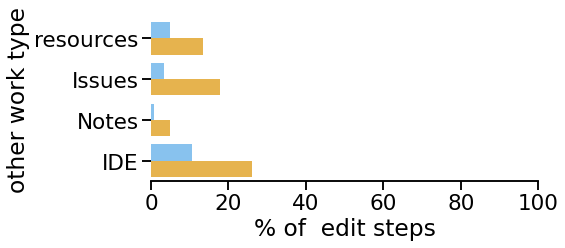

In [16]:
sns.set_context("talk", font_scale=1.3)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',   data=otherEditResult,palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=3.8, aspect=2.2,sharey=False, legend=False)

(g.set_axis_labels("% of  edit steps", "other work type")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("otherEditChara.pdf")

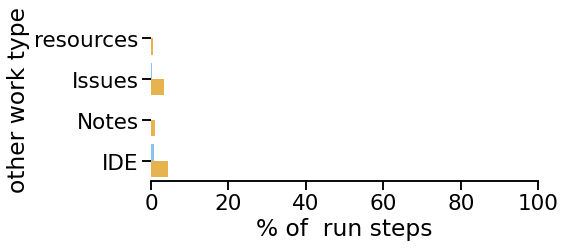

In [17]:
sns.set_context("talk", font_scale=1.3)

g = sns.catplot(x="percentage", y='characteristics', hue="work", kind='bar',data=otherRunResult,palette={"programming": "#FFBB35", "debugging": "#77C5FF"},  orient="h", ci=None, height=3.8, aspect=2.2,sharey=False, legend=False)

(g.set_axis_labels("% of  run steps", "other work type")
  .set_titles("{row_name} {row_var}")
  .set(xlim=(0, 100))
  .despine(left=True))  
g.tight_layout()
plt.savefig("otherRunChara.pdf")

In [18]:
# url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
# response = urllib.request.urlopen(url)
# data = json.loads(response.read())
# with open('test.json', 'w') as json_file:
#     json.dump(data, json_file)

In [49]:
with open('cyclesFlowDebugging.json') as f:
  data = json.load(f)


fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad=35,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color'],
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(width=2500, height=350,font_size=35, title_text="debugging cycle",  font_color="black")
fig.write_image("flowDebugging.pdf", engine="kaleido")
fig.show()


In [50]:
with open('cyclesFlowProgramming.json') as f:
  data = json.load(f)


fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad=35,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color'],
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(width=2500, height=350,font_size=35, title_text="programming cycle", font_color="black")
fig.write_image("flowProgramming.pdf", engine="kaleido")
fig.show()

In [51]:
with open('betweenCyclesflowDebugging.json') as f:
  data = json.load(f)


fig = go.Figure(data=[go.Sankey(
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad=35,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color'],
      x =[.1,.2,.3,.4,.6,.6,.6,.6],
      y =[1,1,1,.92,1.1,.91,1,.82]
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])
fig.update_layout(width=750, height=350,font_size=12, title_text="debugging cycles")
fig.write_image("betweenCyclesflowDebugging.pdf", engine="kaleido")
fig.show()

In [52]:
with open('betweenCyclesflowProgramming.json') as f:
  data = json.load(f)


fig = go.Figure(data=[go.Sankey(
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad=35,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color'],
      x =[.1,.2,.3,.4,.6,.6,.6,.6],
      y =[1,1,1,.92,1.1,.91,1,.82]
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])
fig.update_layout(width=750, height=350,font_size=12, title_text="programming cycles")
fig.write_image("betweenCyclesflowProgamming.pdf", engine="kaleido")
fig.show()